# Data Visualization EDA

## *Overview*
Public and non-profit enitities are eligible to receive Health Center Program grant funding to provide medical, dental, and mental health services to underserved individuals across the United States and its territories. Entities that receive this funding are charged with increasing access to quality health care services to medically underserved populations. 

In this notebook, I will visually explore the relationships between various features of each entity and whether they are correlated with the total health center funding an entity receives. 

[Link to Data Definitions](https://bphc.hrsa.gov/sites/default/files/bphc/data-reporting/2022-uds-manual.pdf)

In [92]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import plotly.express as px
from configuration.config import DATA_PATH

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
health_centers = pd.read_csv(DATA_PATH + 'clean_data_v1.csv')
health_centers_geo = pd.read_csv(DATA_PATH + 'health_center_combined.csv', 
                                 usecols=['BHCMISID', 'GrantNumber', 'HealthCenterName', 'HealthCenterCity', 'HealthCenterState', 'HealthCenterZIPCode'])



In [96]:
health_centers.columns

Index(['BHCMISID', 'GrantNumber', 'HealthCenterName', 'FundingCHC',
       'FundingMHC', 'FundingHO', 'FundingPH', 'UrbanRuralFlag', 'mhc_amount',
       'chc_amount', 'ho_amount', 'ph_amount', 'total_hc_funding',
       'bphc_total', 'total_other_federal_grants', 'total_state_grants',
       'total_local_gov_grants', 'total_private_grants', 'total_other_revenue',
       'total_revenue', 'total_male', 'total_female', 'asian',
       'native_hawaiian', 'pac_isl', 'black', 'am_ind', 'white', 'unreported',
       'hispanic_any_race', 'total_patients', 'lep_patients', 'fpl_100_below',
       'fpl_101_to_150', 'fpl_151_to_200', 'fpl_over_200', 'fpl_unknown',
       'uninsured_0_17', 'uninsured_18_up', 'medicaid_0_17', 'medicaid_18_up',
       'medicare_18_up', 'public_insurance_0_17', 'public_insurance_18_up',
       'private_insurance_0_17', 'private_insurance_18_up', 'total_0_17',
       'total_18_up', 'migrant_patients', 'homeless_patients',
       'school_based_patients', 'veteran_patie

In [97]:
health_centers.head(3)

,BHCMISID,GrantNumber,HealthCenterName,FundingCHC,FundingMHC,FundingHO,FundingPH,UrbanRuralFlag,mhc_amount,chc_amount,...,enabling_virtual_visits,enabling_patients,total_clinic_visits,total_virtual_visits,ZipCode_Count,SiteCity_Count,SiteState_Count,Admin_Service_Delivery_Sites_Count,Service_Delivery_Sites_Count,TotalWeeklyHoursOfOperation
0,010030,H80CS00803,"HOLYOKE HEALTH CENTER, INC.",1,0,0,0,Urban,0,5721128,...,5659.0,4561.0,71491.0,27773.0,50,3.0,1.0,0.0,4.0,175.0
1,010040,H80CS00443,MAINE MOBILE HEALTH PROGRAM INC.,0,1,0,0,Rural,1758567,0,...,175.0,263.0,2381.0,192.0,24,2.0,1.0,4.0,2.0,195.0
2,010060,H80CS00741,"FAIR HAVEN COMMUNITY HEALTH CLINIC, INC.",1,0,0,0,Urban,0,4569124,...,5057.0,3539.0,96387.0,27893.0,62,3.0,1.0,1.0,16.0,603.0


## Health Center Funding and Patients Served

I first want to take a look at the distribution of health center funding, total patients served, and any correlation between these variables across entities. I also want to see if there are any particular clusters around funding and whether an entity is considered a rural or urban provider. 

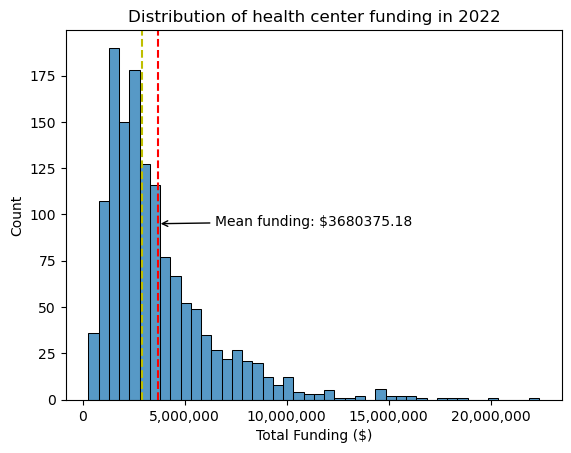

In [98]:
# plot ahealth center funding histogram
fig, ax = plt.subplots()
sns.histplot(x='total_hc_funding', data=health_centers)
plt.title('Distribution of health center funding in 2022')
plt.xlabel('Total Funding ($)')

mean_funding = health_centers['total_hc_funding'].mean()
plt.axvline(mean_funding, linestyle='--', color='r', label=f'Mean funding: ${mean_funding:.2f}')

# Adding text and arrow annotation
plt.annotate('Mean funding: ${:.2f}'.format(mean_funding),
             xy=(mean_funding, 95),
             xycoords='data',
             xytext=(6500000, 100),
             textcoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'),
             horizontalalignment='left',
             verticalalignment='top')

plt.axvline(health_centers['total_hc_funding'].median(), linestyle='--', color='y', label=f'Median funding: ${mean_funding:.2f}')

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 


In [99]:
health_centers[['total_hc_funding']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

,total_hc_funding
count,1370.00
mean,3680375.18
std,2742484.89
min,275778.00
25%,1806490.25
50%,2878258.50
75%,4605680.25
max,22382349.00


Health center funding is heavily right skewed. Most health centers receive less than 3,000,000 of health center funding annually, with the mean funding level just over 3.6 million. 

There are several outliers that get more than 10,000,000 and some as high as 22,000,000 in total health center funding each year. 

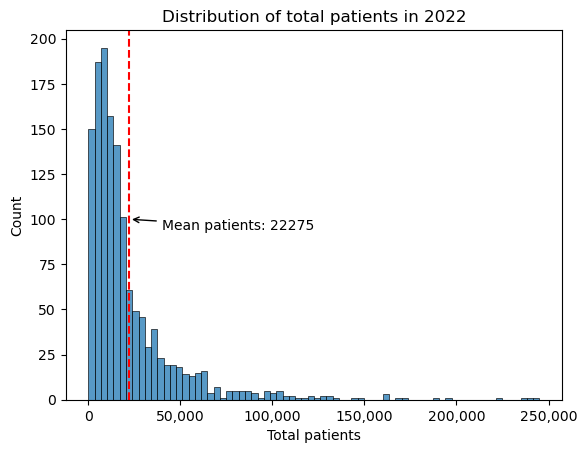

In [100]:
fig, ax = plt.subplots()
sns.histplot(x='total_patients', data=health_centers)
plt.title('Distribution of total patients in 2022')
plt.xlabel('Total patients')

mean_patients = health_centers['total_patients'].mean()
plt.axvline(mean_patients, linestyle='--', color='r', label=f'Mean patients served: {mean_patients:.0f}')

# Adding text and arrow annotation
plt.annotate('Mean patients: {:.0f}'.format(mean_patients),
             xy=(mean_patients, 100),
             xycoords='data',
             xytext=(40000, 100),
             textcoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'),
             horizontalalignment='left',
             verticalalignment='top')


ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 

The total patients served is also heavily skewed to the right. Most health centers serve less than 20,000 patients per year with the mean being just over 22,000 patients per year. 

There are many outliers for this feature as well, with some as high as 100,000 patients per year and the max being just under 250,000 per year. 

I want to take a look at the 10 health centers that receive the most funding. I want to compare this list to the top 10 health centers by patients served. 

In [101]:
top_funded = health_centers[['BHCMISID', 'HealthCenterName', 'total_hc_funding', 'total_patients']]\
                    .sort_values('total_hc_funding', ascending=False)\
                    .merge(health_centers_geo[['BHCMISID', 'HealthCenterName', 'HealthCenterCity', 'HealthCenterState']], 
                           on=['BHCMISID', 'HealthCenterName']).head(10).reset_index()

top_funded.rename(columns={'index':'rank'}, inplace=True)

In [102]:
top_patients = health_centers[['BHCMISID', 'HealthCenterName', 'total_hc_funding', 'total_patients']]\
                    .sort_values('total_patients', ascending=False)\
                    .merge(health_centers_geo[['BHCMISID', 'HealthCenterName', 'HealthCenterCity', 'HealthCenterState']], 
                           on=['BHCMISID', 'HealthCenterName']).head(10).reset_index()

top_patients.rename(columns={'index':'rank'}, inplace=True)

In [103]:
# top funded states
top_funded['HealthCenterState'].value_counts()

HealthCenterState
CA    3
NY    2
WA    1
MN    1
IL    1
CO    1
AL    1
Name: count, dtype: int64

In [104]:
# states with most patients served
top_patients['HealthCenterState'].value_counts()

HealthCenterState
CA    4
WA    2
NY    1
CO    1
IL    1
FL    1
Name: count, dtype: int64

It is interesting that states that have the most funding across entities in the top 10 are not necessarily the states that serve the most patients. I want to take a look at these organizations more closely.

In [105]:
top_funded_vs_patients = top_funded[['HealthCenterName', 'rank']]\
    .join(top_patients[['HealthCenterName', 'rank']], on='rank', lsuffix='_Funding', rsuffix='_Patients')
top_funded_vs_patients

,HealthCenterName_Funding,rank_Funding,HealthCenterName_Patients,rank_Patients
0,"HUDSON RIVER HEALTH CARE, INC.",0,ALTA MED HEALTH SERVICES CORPORATION,0
1,YAKIMA VALLEY FARMWORKERS CLINIC,1,"HUDSON RIVER HEALTH CARE, INC.",1
2,CLINICA SIERRA VISTA,2,FAMILY HEALTHCARE NETWORK,2
3,"WEST SIDE COMMUNITY HEALTH SERVICES, INC. DBA ...",3,SEA-MAR COMMUNITY HEALTH CENTER,3
4,"FAMILY HEALTH CENTERS OF SAN DIEGO, INC.",4,YAKIMA VALLEY FARMWORKERS CLINIC,4
5,"SUNSET PARK HEALTH COUNCIL, INC",5,DENVER HEALTH & HOSPITAL AUTHORITY,5
6,SIHF HEALTHCARE,6,ACCESS COMMUNITY HEALTH NETWORK,6
7,DENVER HEALTH & HOSPITAL AUTHORITY,7,"MCR HEALTH, INC.",7
8,FAMILY HEALTHCARE NETWORK,8,"UNITED HLTH CNTRS OF SAN JOAQUIN VALLEY, INC.",8
9,"QUALITY OF LIFE HEALTH SERVICES, INC.",9,"FAMILY HEALTH CENTERS OF SAN DIEGO, INC.",9


In [106]:
top_funded_vs_patients = top_funded\
    .join(top_patients, on='rank', lsuffix='_Funding', rsuffix='_Patients')
top_funded_vs_patients['funding_difference'] = top_funded_vs_patients['total_hc_funding_Patients'] - top_funded_vs_patients['total_hc_funding_Funding']
top_funded_vs_patients['patient_difference'] = top_funded_vs_patients['total_patients_Patients'] - top_funded_vs_patients['total_patients_Funding']
top_funded_vs_patients[['HealthCenterName_Funding', 'HealthCenterName_Patients', 'funding_difference', 'patient_difference']]

,HealthCenterName_Funding,HealthCenterName_Patients,funding_difference,patient_difference
0,"HUDSON RIVER HEALTH CARE, INC.",ALTA MED HEALTH SERVICES CORPORATION,-10545167,5438
1,YAKIMA VALLEY FARMWORKERS CLINIC,"HUDSON RIVER HEALTH CARE, INC.",2355213,44627
2,CLINICA SIERRA VISTA,FAMILY HEALTHCARE NETWORK,-2757398,108224
3,"WEST SIDE COMMUNITY HEALTH SERVICES, INC. DBA ...",SEA-MAR COMMUNITY HEALTH CENTER,-3649396,187700
4,"FAMILY HEALTH CENTERS OF SAN DIEGO, INC.",YAKIMA VALLEY FARMWORKERS CLINIC,2635820,33511
5,"SUNSET PARK HEALTH COUNCIL, INC",DENVER HEALTH & HOSPITAL AUTHORITY,-569253,40352
6,SIHF HEALTHCARE,ACCESS COMMUNITY HEALTH NETWORK,-858362,79031
7,DENVER HEALTH & HOSPITAL AUTHORITY,"MCR HEALTH, INC.",-6143340,-20640
8,FAMILY HEALTHCARE NETWORK,"UNITED HLTH CNTRS OF SAN JOAQUIN VALLEY, INC.",-2538602,-73702
9,"QUALITY OF LIFE HEALTH SERVICES, INC.","FAMILY HEALTH CENTERS OF SAN DIEGO, INC.",1883576,139224


Although there is some overlap, health centers that serve more patients don't necessarily receive more health center grant funding. For example, Alta Med Health Services Corporation is the top patient serving health center and serves 5,438 more patients a year than the Hudson River Health Care, Inc, the entity that receives the most health center funding. Alta Med is actually not even in the top 10 funded health centers, despite serving the most patients. 

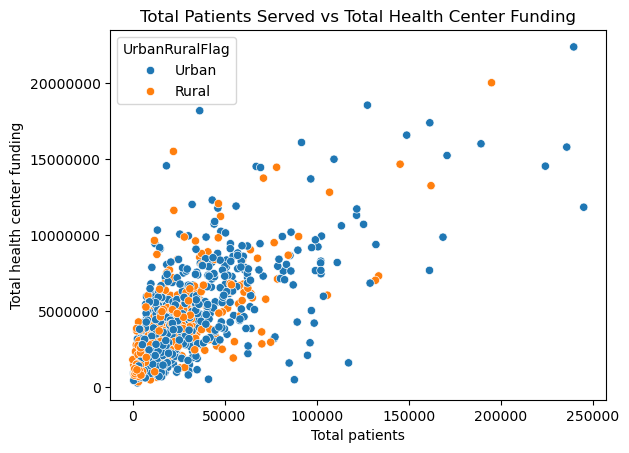

In [107]:
# scatter plot of health center funding vs total patients served
fix, ax = plt.subplots()

sns.scatterplot(x='total_patients', y='total_hc_funding', data=health_centers, hue='UrbanRuralFlag')
plt.title('Total Patients Served vs Total Health Center Funding')
plt.xlabel('Total patients')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')

There isn't an immediate relationship between urban vs rural health centers and funding. It is suprising to see that there are a few rural providers that serve significantly more patients than some urban providers. Additionally, we can see the outliers as far as those who serve an average number of patients but receive nearly twice as much funding as entities serving the same number of patients. I'll want to investigate this further with other features like other funding sources, social determinants of health in their patient populations, high need, and operational details. 

## Funding Streams 

I want to take a closer look at non-patient revenue streams and any interesting trends.

In [108]:
health_centers[['total_hc_funding',
       'bphc_total', 'total_other_federal_grants', 'total_state_grants', 'total_local_gov_grants',
       'total_private_grants', 'total_other_revenue', 'total_revenue']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

,total_hc_funding,bphc_total,total_other_federal_grants,total_state_grants,total_local_gov_grants,total_private_grants,total_other_revenue,total_revenue
count,1370.00,1370.00,1370.00,1370.00,1370.00,1370.00,1370.00,1370.00
mean,3680375.18,6083818.79,436239.39,762134.93,663975.56,789697.27,1085496.32,10502179.81
std,2742484.89,5085304.63,1276170.74,1611098.48,2403658.03,1617238.87,11669837.02,17029869.00
min,275778.00,358149.00,0.00,0.00,0.00,0.00,0.00,828062.00
25%,1806490.25,2972587.00,0.00,0.00,0.00,15000.00,14649.75,4132924.25
50%,2878258.50,4554745.50,0.00,177436.00,0.00,212104.00,134991.50,6656907.00
75%,4605680.25,7326313.00,241087.25,757408.00,300000.00,858781.25,546141.25,12394355.25
max,22382349.00,48065368.00,13597206.00,19982632.00,48056004.00,22007477.00,415573508.00,485335878.00


Most organizations do not receive other federal grants or local government grants. Many do receive state and private funding as well as other revenue.

I'm interested to know the total health center funding as a proportion of total non-patient revenue. I also want to see the health center funding as a proportion of total grant funding.

After gathering some new summary data, I will drop the detailed breakdown of grant funding type to reduce the number of features. I will preserve information about health center funding, other revenue, and total revenue. 

In [109]:
# calculate health center funding as a proportion of total revenue
health_centers['hc_grant_revenue_ratio'] = health_centers['total_hc_funding'] / health_centers['total_revenue']

# calculate health center funding as a proportion of all grant funding
cols_to_sum = ['bphc_total', 'total_other_federal_grants', 'total_state_grants', 'total_local_gov_grants', 'total_private_grants']
health_centers['total_grant_funding'] = health_centers[cols_to_sum].sum(axis=1)
health_centers['hc_other_grants_ratio'] = health_centers['total_hc_funding'] / health_centers['total_grant_funding']

# calculate total grant funding as a proportion of total revenue
health_centers['grants_to_rev_ratio'] = health_centers['total_grant_funding'] / health_centers['total_revenue']


In [110]:
# drop detailed grant type columns
health_centers.drop(columns=cols_to_sum, inplace=True)

In [111]:
# display information about ratios
health_centers[['hc_grant_revenue_ratio', 'hc_other_grants_ratio', 'grants_to_rev_ratio']].describe()

,hc_grant_revenue_ratio,hc_other_grants_ratio,grants_to_rev_ratio
count,1370.000000,1370.000000,1370.000000
mean,0.452563,0.497241,0.905740
std,0.181090,0.180159,0.128635
min,0.006886,0.015549,0.085569
25%,0.319985,0.373976,0.873499
50%,0.450789,0.495841,0.949123
75%,0.581801,0.621969,0.988223
max,1.000000,1.000000,1.000000


Text(0.5, 0, 'Ratio')

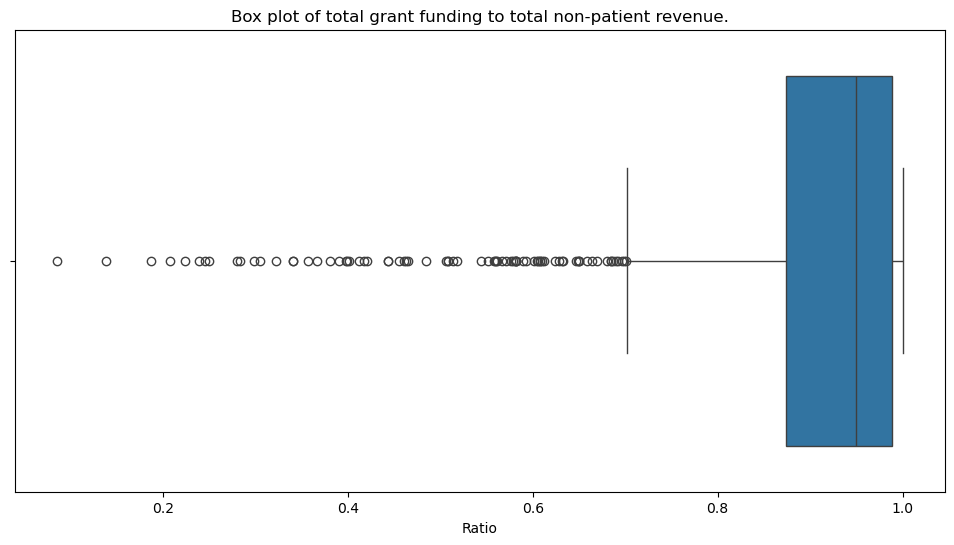

In [112]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Box plot of total grant funding to total non-patient revenue.')
sns.boxplot(x='grants_to_rev_ratio', data=health_centers)

plt.xlabel('Ratio')

For the majority of health centers, grant funding makes up between 85 to 99% of their total non-patient revenue. There are several outliers however where grant funding does not even make up 70% of their non-patient revenue. I want to look at their other revenue to total non-patient revenue.

Text(0.5, 0, 'Ratio')

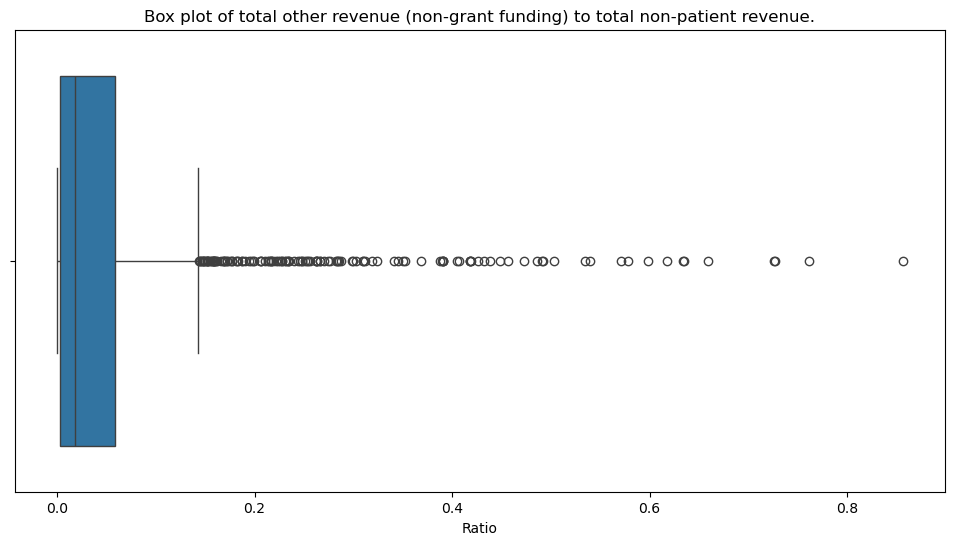

In [113]:
# calculate total other revenue  as a proportion of total revenue
health_centers['other_to_rev_ratio'] = health_centers['total_other_revenue'] / health_centers['total_revenue']

fig, ax = plt.subplots(figsize=(12,6))

plt.title('Box plot of total other revenue (non-grant funding) to total non-patient revenue.')
sns.boxplot(x='other_to_rev_ratio', data=health_centers)

plt.xlabel('Ratio')

Other revenue includes revenue that is unrelated to charge- based services or to grants. This includes things like fundraising, interest revenue, rent from tenants, patient health records fees, individual monetary donations, receipts from vending machines, retail pharmacy sales to the public (i.e., non–health center patients), and gains on the sale of an asset.

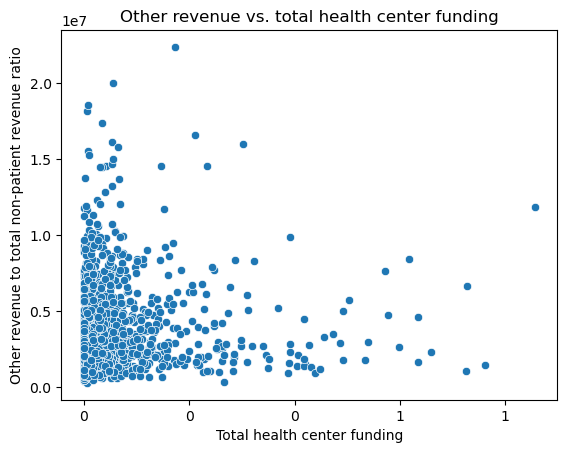

In [114]:
fig, ax = plt.subplots()
plt.title('Other revenue vs. total health center funding')
sns.scatterplot(x='other_to_rev_ratio', y='total_hc_funding', data=health_centers)

plt.xlabel('Total health center funding')
plt.ylabel('Other revenue to total non-patient revenue ratio')

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 

In [115]:
funding = health_centers[['total_patients', 
                'total_hc_funding',
                'total_grant_funding',
                'total_other_revenue', 
                'total_revenue',
                'total_charges', 
                'total_collected', 
                'total_sfs']]

In [116]:
funding.describe().apply(lambda x: x.apply('{0:.2f}'.format))

,total_patients,total_hc_funding,total_grant_funding,total_other_revenue,total_revenue,total_charges,total_collected,total_sfs
count,1370.00,1370.00,1370.00,1370.00,1370.00,1370.00,1370.00,1370.00
mean,22275.38,3680375.18,8735865.94,1085496.32,10502179.81,32072555.94,21578783.65,2784978.58
std,27272.99,2742484.89,8560804.94,11669837.02,17029869.00,52289828.28,39161810.86,5437375.02
min,154.00,275778.00,823880.00,0.00,828062.00,7314.00,0.00,0.00
25%,7009.50,1806490.25,3742107.75,14649.75,4132924.25,7029886.00,4407925.00,273691.50
50%,13685.50,2878258.50,6119766.00,134991.50,6656907.00,16803580.50,9991127.50,950564.00
75%,26131.50,4605680.25,10541913.25,546141.25,12394355.25,37043888.75,23536747.00,2740335.50
max,245012.00,22382349.00,91290264.00,415573508.00,485335878.00,672511973.00,525686359.00,64698474.00


I'm interested to look at the entity or entities that have 0 sliding fee scale discounts. Health centers are mandated to offer services on a sliding fee scale by law, so it is curious why there would be an entity that says 0 sfs discounts provided. 

In [117]:
no_sfs = health_centers[health_centers['total_sfs'] == 0][['HealthCenterName', 'total_hc_funding']]
print(no_sfs.shape)
no_sfs

(17, 2)


,HealthCenterName,total_hc_funding
15,NORTHWEST COMMUNITY HEALTH CARE,2779828
140,MOUNT VERNON NEIGHBORHOOD HEALTH CENTER,8064511
294,LA CLINICA DEL PUEBLO,2810233
507,AFFINITY HEALTH CENTER,2053266
551,"RECOVERY CONSULTANTS OF ATLANTA, INCORPORATED",1246352
751,LUTHERAN SOCIAL SERVICES OF CENTRAL OHIO,1369045
804,NEW ORLEANS HEALTH DEPARTMENT,2040900
851,SWLA CENTER FOR HEALTH SERVICES,5221999
993,COLORADO COALITION FOR THE HOMELESS,9178083
1023,"COMMUNITY ACTION OF LARAMIE COUNTY, INC.",438893


There are 17 organizations that did not report any sliding fee scale discount charges. I wanted to see if maybe this was because they are brand new entities. I looked up the first three organizations and they do say they offer sliding fee scales at their organizations. I am not sure why 0 would be lsited for these entities. 

In [118]:
health_centers['collections_charges_ratio'] = health_centers['total_collected'] / health_centers['total_charges']

In [119]:
health_centers[['HealthCenterName', 'collections_charges_ratio']].sort_values('collections_charges_ratio', ascending=False)

,HealthCenterName,collections_charges_ratio
925,"PROTEUS EMPLOYMENT OPPORTUNITIES, INC.",9.259837
1362,"N. A. T. I. V. E. PROJECT, THE",2.862926
767,"MORA VALLEY COMMUNITY HEALTH SERVICES, INC.",2.801866
1280,WHITE BIRD CLINIC,2.635001
1286,YAKIMA VALLEY FARMWORKERS CLINIC,2.140570
...,...,...
873,DALLAS COUNTY HOSPITAL DISTRICT,0.030277
1011,"ENTERPRISE VALLEY MEDICAL CLINIC, INC.",0.021279
1,MAINE MOBILE HEALTH PROGRAM INC.,0.004277
389,PINELLAS COUNTY BOARD OF COUNTY COMMISSIONERS,0.000307


I'm not sure how to interpret the results of the collections to charges ratio. Health centers should not be collecting more per visit than what is charged. The overage may be due to collecting on charges made in a previous year. I may need to drop these columns due to insufficient understanding of the data being collected. 

### **Q for Eric: How could entities have over 1.0 ratios for collections / charges?** 

## Social Determinants of Health 

I want to look how and if social determinant of health and funding is correlated. Health centers are supposed to increase access to care for vulnerable populations. Do entities that serve more vulnerable populations receive more funding? Which SDOH impact funding the most?

**Financial Insecurity**

First I will take a look at total number of people served at or below 100% Federal Poverty Level. Financial barriers to care is one of the most pressing challenges to address in access to care. I would think this heavily influences total health center funding. 

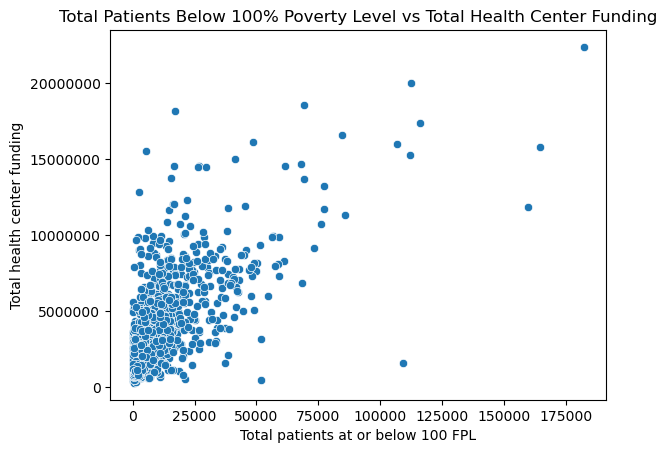

In [120]:
fix, ax = plt.subplots()

sns.scatterplot(x='fpl_100_below', y='total_hc_funding', data=health_centers)
plt.title('Total Patients Below 100% Poverty Level vs Total Health Center Funding')
plt.xlabel('Total patients at or below 100 FPL')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')

It apeears that the entity that receives the most health center funding also serves the greatest number of patients at or below 100% federally poverty level. They serve over 175,000 patiets with high financial barriers to care. 

Several other outlier entities also receive a lot of funding for high number of financially insecure individuals. However, there are also quite a few entities that receive high amount of funding and do not serve that many financial insecure patients by comparison.

I am going to use Plotly so I can make this scatter plot more interactive to see which intities they are. 

In [121]:
df = health_centers
fig = px.scatter(df, x='fpl_100_below', y='total_hc_funding', hover_data='HealthCenterName', 
                 size='total_patients', 
                 title = "Total patients at or below 100% FPL vs Health center funding", 
                 width=800, height=600)
fig.show()

We see that Hudson is the entity that provides the most in terms of care to people at or below 100% federal poverty level, serving 182.3K patients in 2022. 

In [122]:
health_centers.columns

Index(['BHCMISID', 'GrantNumber', 'HealthCenterName', 'FundingCHC',
       'FundingMHC', 'FundingHO', 'FundingPH', 'UrbanRuralFlag', 'mhc_amount',
       'chc_amount', 'ho_amount', 'ph_amount', 'total_hc_funding',
       'total_other_revenue', 'total_revenue', 'total_male', 'total_female',
       'asian', 'native_hawaiian', 'pac_isl', 'black', 'am_ind', 'white',
       'unreported', 'hispanic_any_race', 'total_patients', 'lep_patients',
       'fpl_100_below', 'fpl_101_to_150', 'fpl_151_to_200', 'fpl_over_200',
       'fpl_unknown', 'uninsured_0_17', 'uninsured_18_up', 'medicaid_0_17',
       'medicaid_18_up', 'medicare_18_up', 'public_insurance_0_17',
       'public_insurance_18_up', 'private_insurance_0_17',
       'private_insurance_18_up', 'total_0_17', 'total_18_up',
       'migrant_patients', 'homeless_patients', 'school_based_patients',
       'veteran_patients', 'public_housing_patients', 'total_costs_medical',
       'total_costs_dental', 'total_costs_mh', 'total_costs_enablin

**Racial and Ethnic Minorities**

Race and ethnicity are two other factors that largely influence individuals' access to care. This is largely due to historical and systemic racism in the United States. Although we will not be examining how this influences access to care at an individual level, I want to see if it does impact the funding levels for organizations. Specifically, do organizations that serve higher proportions of racial and ethnic diversity receive more funding?

We are going to need to aggregate the race columns into a new racial diversity column which will exclude white, hispanic any race and unreported. We are exclusing hispanic any race since this is an ethnicity. Also, patients represented as hispanic could also be counted as a race, so we don't want to double count them. 

Because some health centers serve a lot more patients that others, I will also want to calculate these as proportions for analysis. 

In [123]:
# identify columns to aggregate
race_cols_agg = ['asian', 'native_hawaiian', 'pac_isl', 'black', 'am_ind']

# sum up these results
health_centers['diverse_patients_sum'] = health_centers[race_cols_agg].sum(axis=1)

# calculate the proportion of total patients that are diverse
health_centers['diverse_race_proportion'] = health_centers['diverse_patients_sum'] / health_centers['total_patients']
health_centers['hispanic_proportion'] = health_centers['hispanic_any_race'] / health_centers['total_patients']

In [125]:
fig = px.scatter(df, x='diverse_patients_sum', y='total_hc_funding', hover_data='HealthCenterName',
                 title = "Diverse patient population count vs Health center funding", 
                 width=800, height=600)
fig.show()

In [128]:
fig = px.scatter(df, x='diverse_race_proportion', y='total_hc_funding', hover_data='HealthCenterName',
                 title = "Proportion of patient population that is racially diverse vs Health center funding", 
                 width=800, height=600)
fig.show()

In [129]:
fig = px.scatter(df, x='hispanic_any_race', y='total_hc_funding', hover_data='HealthCenterName',
                 title = "Hispanic patient population  that is Hispanic vs Health center funding", 
                 width=800, height=600)
fig.show()

In [127]:
fig = px.scatter(df, x='hispanic_proportion', y='total_hc_funding', hover_data='HealthCenterName',
                 title = "Proportion of patient population  that is Hispanic vs Health center funding", 
                 width=800, height=600)
fig.show()

There does not appear to be any clear relationship between either proportion of racially or ethnically diverse patients and total health center funding. However, there appears to be a positive correlation between the number of racially or ethnically diverse patients served and total health center funding. This could purely be because of the total patient counts instead of race or ethnicity alone. 

In [130]:
# drop columns
health_centers.drop(columns=(race_cols_agg), inplace=True)
health_centers.drop(columns=['white', 'unreported'], inplace=True)

Okay, I want to get a brief overview of any relationship the other social determinants of health may have to total health center funding. I will quickly visualize them as scatter plots. Several of these features may make more sense to aggregate, such as the various insurance groupings. 

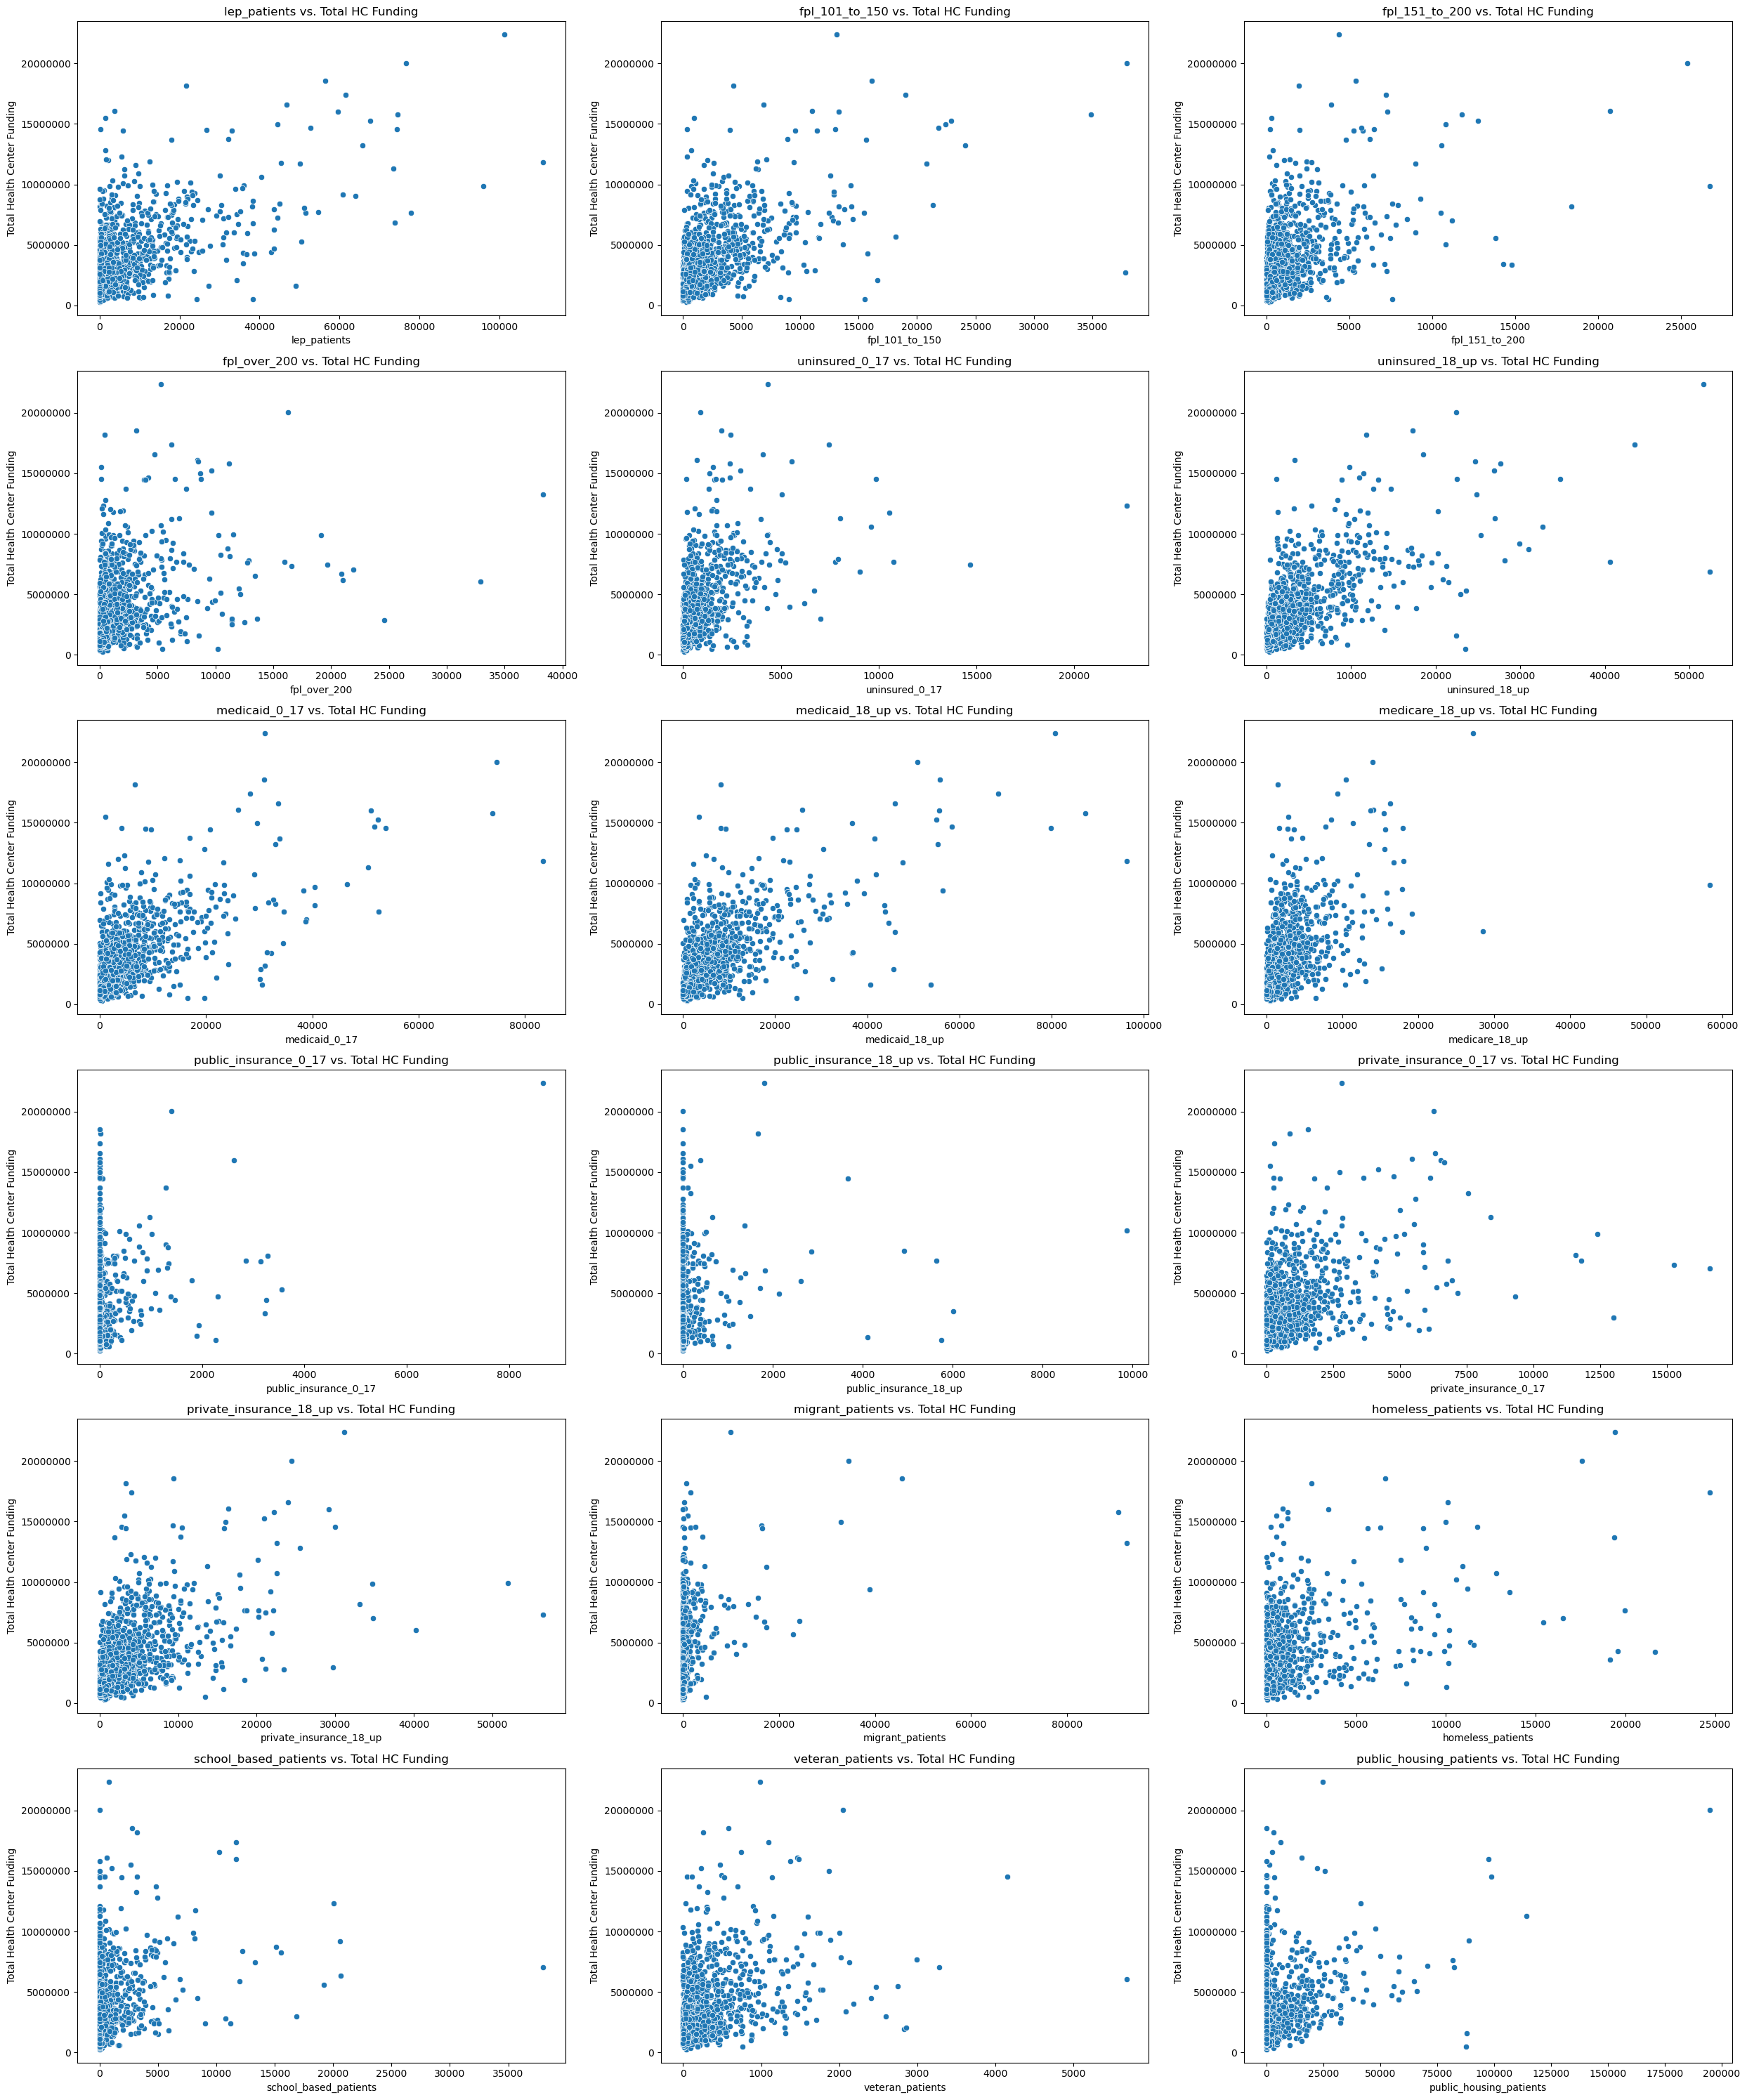

In [138]:
# Define the list of x variables you want to plot against 'total_hc_funding'
sdoh_vars = [
    'lep_patients', 'fpl_101_to_150', 'fpl_151_to_200', 'fpl_over_200',
    'uninsured_0_17', 'uninsured_18_up', 'medicaid_0_17', 'medicaid_18_up',
    'medicare_18_up', 'public_insurance_0_17', 'public_insurance_18_up',
    'private_insurance_0_17', 'private_insurance_18_up',
    'migrant_patients', 'homeless_patients', 'school_based_patients',
    'veteran_patients', 'public_housing_patients'
]

# create subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25, 30))  # Adjust the size as necessary
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop over the variables and create a scatter plot for each
for i, var in enumerate(sdoh_vars):
    sns.scatterplot(ax=axes[i], data=health_centers, x=var, y='total_hc_funding')
    axes[i].set_title(f'{var} vs. Total HC Funding')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Total Health Center Funding')
    axes[i].ticklabel_format(style='plain', axis='both')  # Turn off scientific notation

plt.tight_layout()
plt.show()

In [145]:
# Calculate correlation matrix
correlation_matrix = health_centers[['total_hc_funding'] + sdoh_vars].corr()

In [146]:
# Extract correlations for 'total_hc_funding' against all other variables
funding_correlations = correlation_matrix['total_hc_funding'].drop('total_hc_funding')
funding_correlations

lep_patients               0.600749
fpl_101_to_150             0.574691
fpl_151_to_200             0.491772
fpl_over_200               0.363069
uninsured_0_17             0.496376
uninsured_18_up            0.647674
medicaid_0_17              0.630195
medicaid_18_up             0.652952
medicare_18_up             0.535384
public_insurance_0_17      0.251546
public_insurance_18_up     0.150301
private_insurance_0_17     0.422270
private_insurance_18_up    0.526265
migrant_patients           0.353842
homeless_patients          0.427889
school_based_patients      0.294724
veteran_patients           0.372156
public_housing_patients    0.315574
Name: total_hc_funding, dtype: float64

Although several of these features appear to be strongly correlated with funding, I believe it may be due to total patients served rather than these features themselves. I will aggregate across age groups and then calculate proportions for each of these categories instead. I will then delete these columns from the dataset.

In [150]:
# create aggregations
health_centers['lep_ratio'] = health_centers['lep_patients'] / health_centers['total_patients']
health_centers['uninsured_ratio'] = (health_centers['uninsured_0_17'] + health_centers['uninsured_18_up']) / health_centers['total_patients']
health_centers['medicaid_ratio'] = (health_centers['medicaid_0_17'] + health_centers['medicaid_18_up']) / health_centers['total_patients']
health_centers['medicare_ratio'] = health_centers['medicare_18_up'] / health_centers['total_patients']
health_centers['public_insurance_ratio'] = (health_centers['public_insurance_0_17'] + health_centers['public_insurance_18_up']) / health_centers['total_patients']
health_centers['private_insurance_ratio'] = (health_centers['private_insurance_0_17'] + health_centers['private_insurance_18_up']) / health_centers['total_patients']
health_centers['migrant_ratio'] = health_centers['migrant_patients'] / health_centers['total_patients']
health_centers['homeless_patients'] = health_centers['homeless_patients'] / health_centers['total_patients']
health_centers['school_based_patients'] = health_centers['school_based_patients'] / health_centers['total_patients']
health_centers['veteran_patients'] = health_centers['veteran_patients'] / health_centers['total_patients']
health_centers['public_housing_patients'] = health_centers['public_housing_patients'] / health_centers['total_patients']

# create special populations grouping
special_pops = ['migrant_patients', 'homeless_patients', 'public_housing_patients']
health_centers['special_populations_ratio'] = health_centers[special_pops].sum(axis=1) / health_centers['total_patients']


In [160]:
sdoh_props = ['lep_ratio', 'uninsured_ratio', 'medicaid_ratio', 'medicare_ratio', 'public_insurance_ratio', 
              'private_insurance_ratio','migrant_ratio', 'special_populations_ratio']

correlation_matrix = health_centers[['total_hc_funding'] + sdoh_props].corr()

funding_correlations_v2 = correlation_matrix['total_hc_funding'].drop('total_hc_funding')
funding_correlations_v2.sort_values()

private_insurance_ratio     -0.156647
medicare_ratio              -0.135683
public_insurance_ratio       0.002552
uninsured_ratio              0.040068
medicaid_ratio               0.125856
special_populations_ratio    0.127371
migrant_ratio                0.127371
lep_ratio                    0.184767
Name: total_hc_funding, dtype: float64

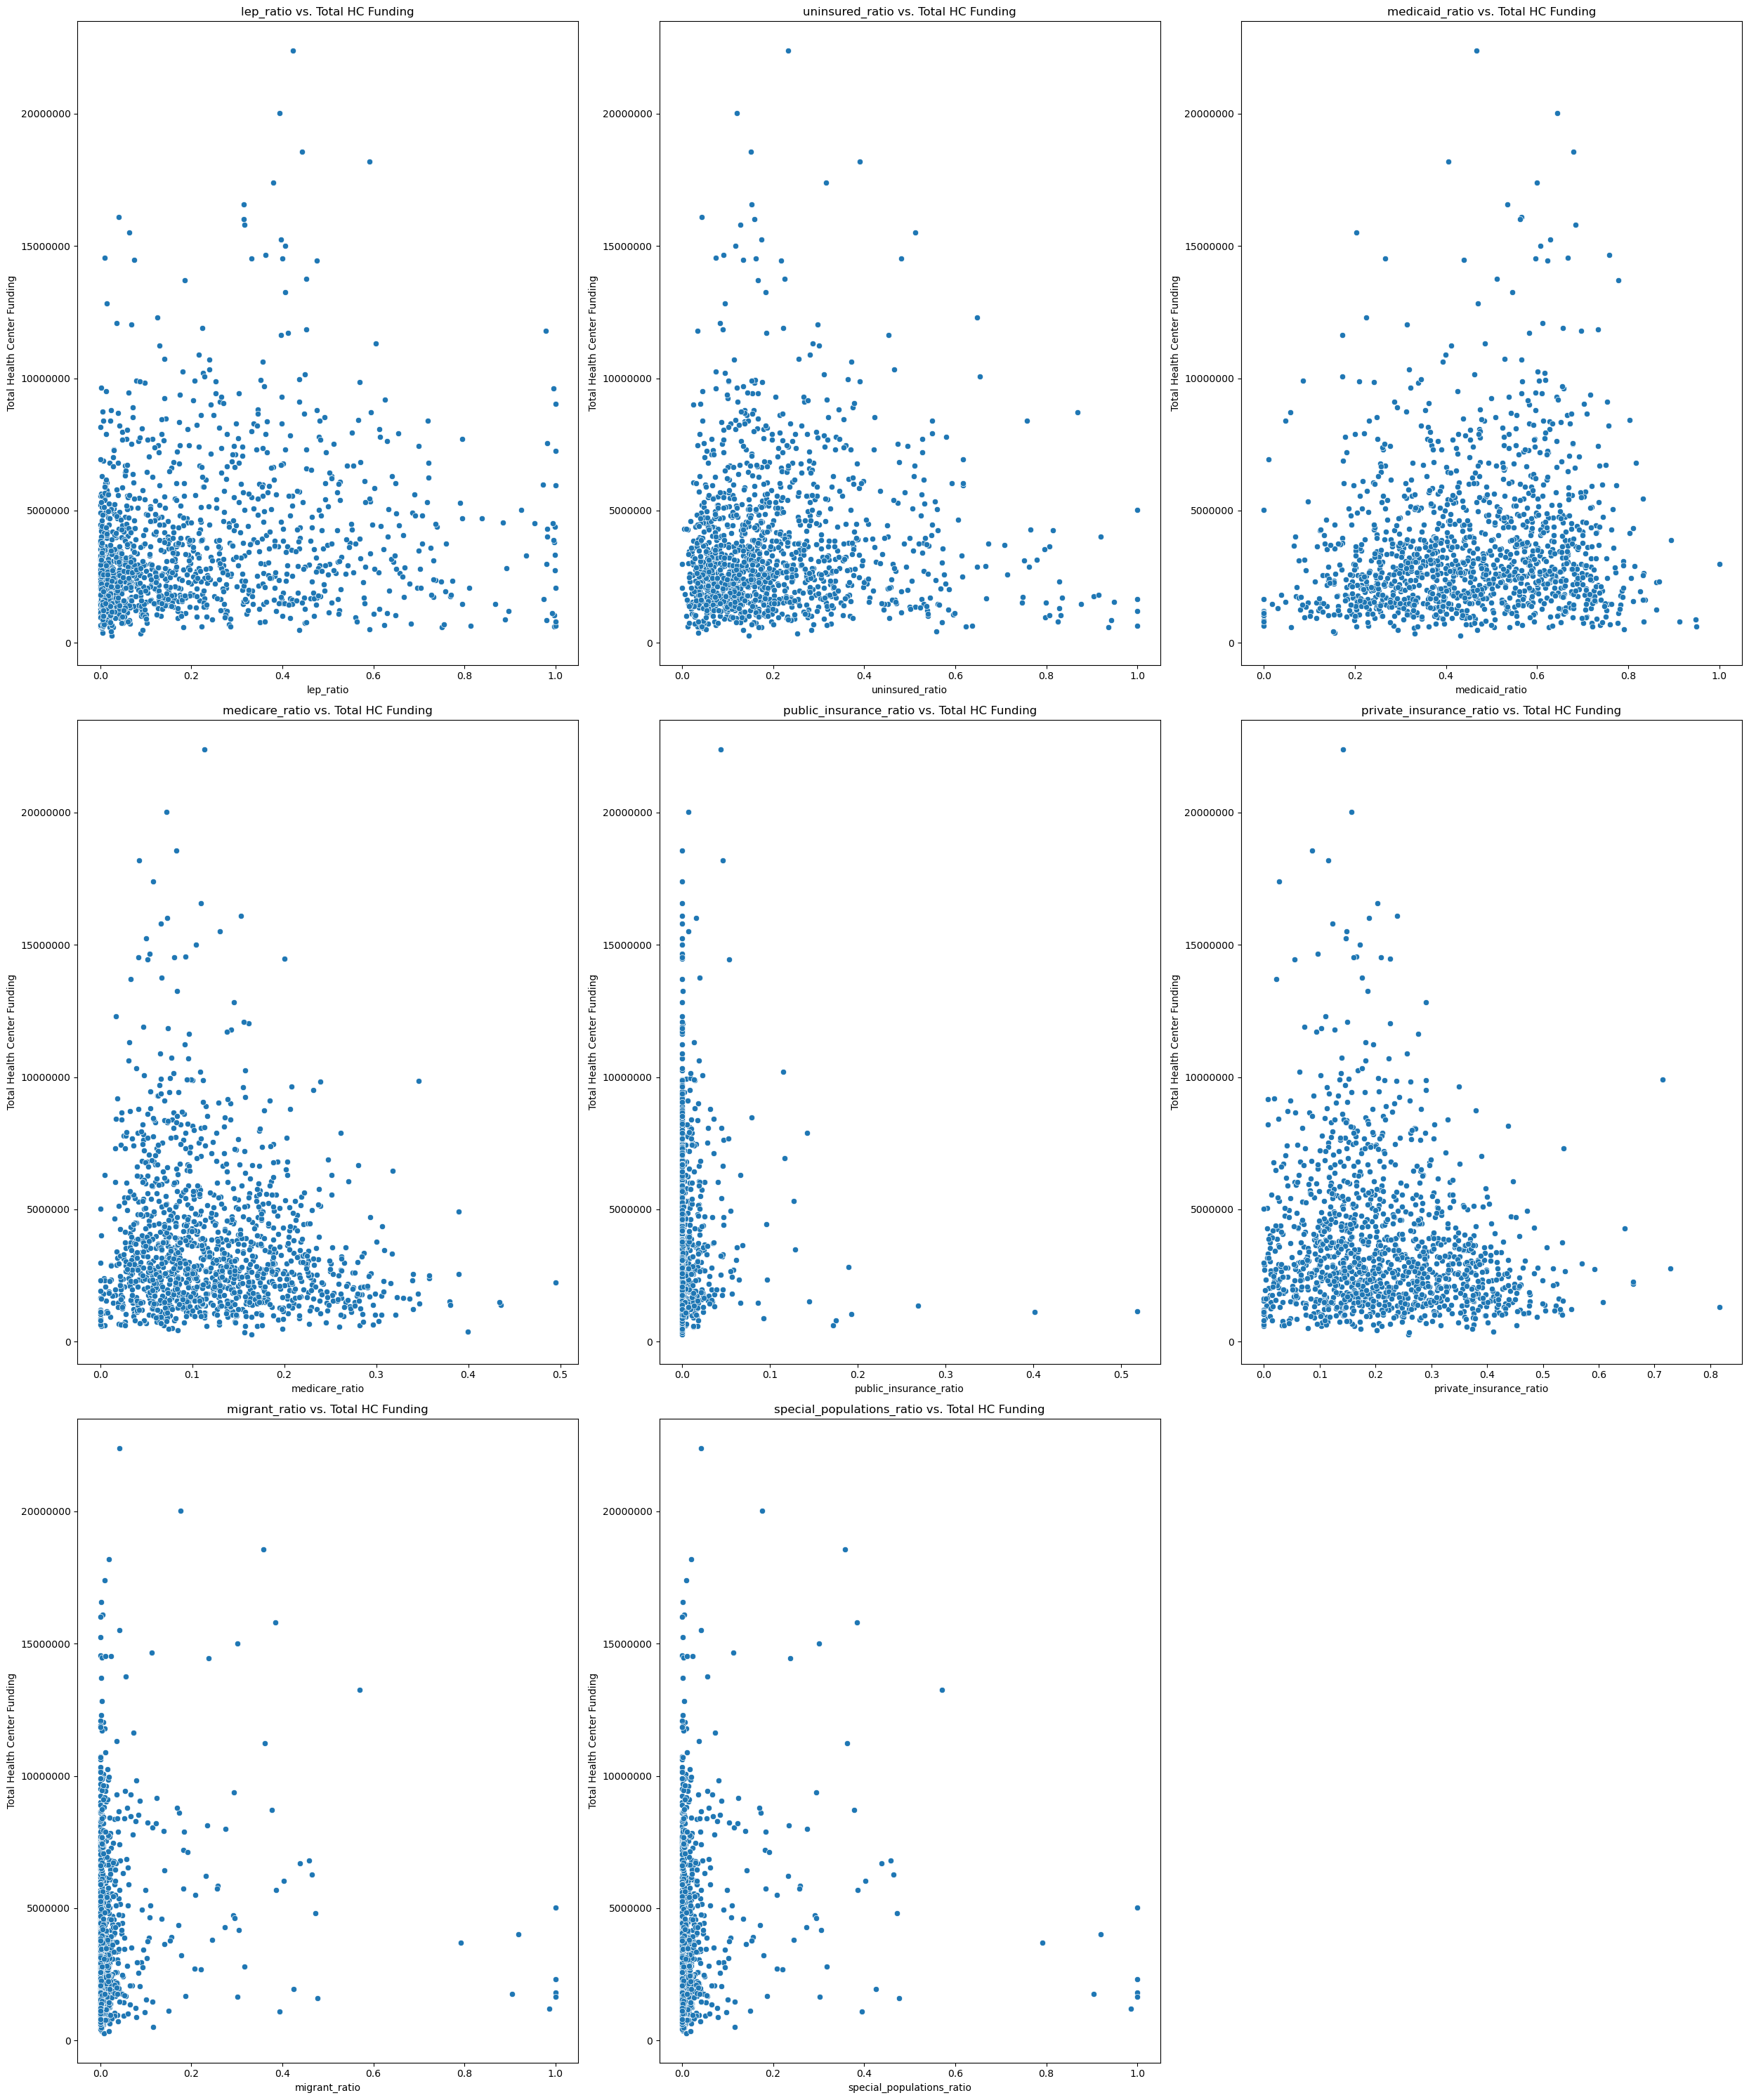

In [158]:
# create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 30))  # Adjust the size as necessary
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop over the variables and create a scatter plot for each
for i, var in enumerate(sdoh_props):
    sns.scatterplot(ax=axes[i], data=health_centers, x=var, y='total_hc_funding')
    axes[i].set_title(f'{var} vs. Total HC Funding')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Total Health Center Funding')
    axes[i].ticklabel_format(style='plain', axis='both')  # Turn off scientific notation

for ax in axes[len(sdoh_props):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

We see some minor correlations between social determinants of health and total health center funding. I am surprised to see that there is virtually no correlation between proportion of uninsured patients and total funding received. 

In [153]:
# drop columns
health_centers = health_centers.drop(columns=sdoh_vars)

## Health Center Operations

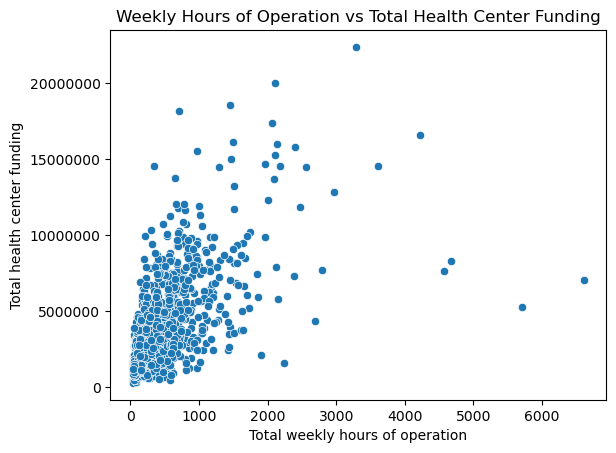

In [18]:
fix, ax = plt.subplots()

sns.scatterplot(x='TotalWeeklyHoursOfOperation', y='total_hc_funding', data=health_centers)
plt.title('Weekly Hours of Operation vs Total Health Center Funding')
plt.xlabel('Total weekly hours of operation')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')